# Datos Alumno
- Nombre: Diego Galaviz Plascencia
- Número de control: 20390023

In [4]:
#De este lado importamos la libreria pandas para poder realizar la lectura de los datos.
import pandas as pd

In [ ]:
#Instalo seaborn para poder realizar la visualizacion de datos, como por ejemplo una grafica que se encuentra mas adelante.
!pip install seaborn


In [41]:
#Instalar sklearn
!pip install scikit-learn

     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.3 MB 960.0 kB/s eta 0:00:09
      --------------------------------------- 0.2/8.3 MB 1.8 MB/s eta 0:00:05
     - -------------------------------------- 0.3/8.3 MB 2.1 MB/s eta 0:00:04
     - -------------------------------------- 0.4/8.3 MB 2.1 MB/s eta 0:00:04
     -- ------------------------------------- 0.5/8.3 MB 2.2 MB/s eta 0:00:04
     --- ------------------------------------ 0.7/8.3 MB 2.5 MB/s eta 0:00:03
     --- ------------------------------------ 0.8/8.3 MB 2.5 MB/s eta 0:00:03
     ---- ----------------------------------- 0.9/8.3 MB 2.4 MB/s eta 0:00:04
     ----- ---------------------------------- 1.0/8.3 MB 2.5 MB/s eta 0:00:03
     ----- ---------------------------------- 1.2/8.3 MB 2.4 MB/s eta 0:00:03
     ------ --------------------------------- 1.3/8.3 MB 2.5 MB/s eta 0:00:03
     ------ --------------------------------- 1.4/8.3 MB 2.4 MB/s eta


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
#Aqui leemos los datos poniendo la ruta del archivo asignado.
data = pd.read_csv("diabetes_prediction_dataset.csv")


# Understanding the Data

Para poder trabajar con este data set tenemos que familiarizarnos con ellos y saber que informacion contiene en sus filas y columnas, para ello haremos una visualizacion del contenido con el que trabajaré a continuación.
Algunos datos necesarios para realizar esta demostración son:

- Número de filas y columnas
- Número de variables categóricas y número de valores únicos para cada
- Resumen de estadísticas para atributos y etiquetas.

In [36]:
# Número de filas y columnas
num_rows, num_cols = data.shape
print("Número de filas:", num_rows)
print("Número de columnas:", num_cols)


Número de filas: 100000
Número de columnas: 9


In [37]:
# Variables categóricas
categorical_columns = data.select_dtypes(include='object').columns.tolist()
print("Número de variables categóricas:", len(categorical_columns))

# Número de valores únicos para cada variable categórica
for column in categorical_columns:
    unique_values = data[column].nunique()
    print(f"Variable: {column}, Número de valores únicos: {unique_values}")


Número de variables categóricas: 2
Variable: gender, Número de valores únicos: 3
Variable: smoking_history, Número de valores únicos: 6


In [39]:
# Resumen estadístico para atributos y etiquetas
attribute_stats = data.describe()
print("Resumen de estadísticas para atributos y etiquetas:")
print(attribute_stats)


Resumen de estadísticas para atributos y etiquetas:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.00000

In [32]:
#Con este método podemos mostrar las filas que hay en el data set, dentro del parentesis ponemos las filas que querramos mostrar.
data.head(10)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [16]:
#De este lado podemos ver resultados estadísticos de unicamente las filas que hayamos seleccionado.
data.describe()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


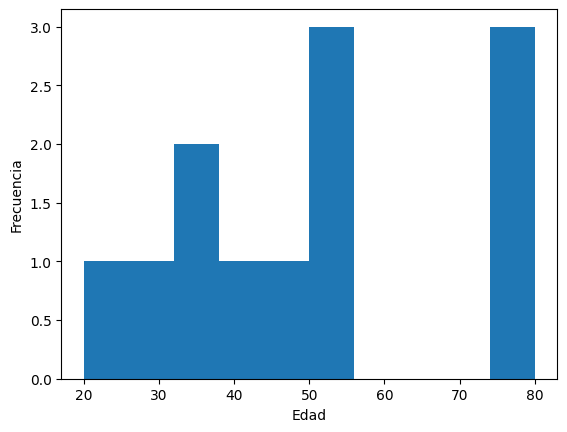

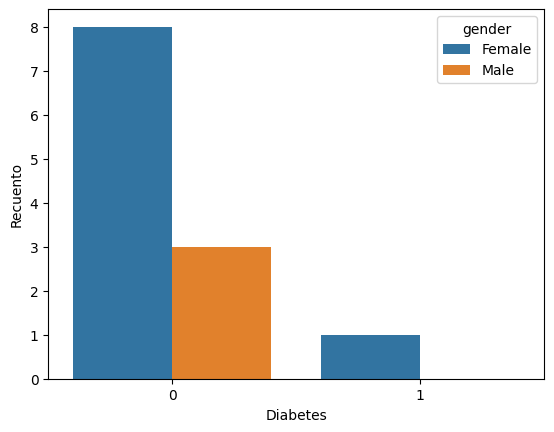

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de la edad
plt.hist(data['age'])
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras de la diabetes por género
sns.countplot(x='diabetes', hue='gender', data=data)
plt.xlabel('Diabetes')
plt.ylabel('Recuento')
plt.show()


C:\Users\diego\AppData\Local\Temp\ipykernel_5124\4280323826.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


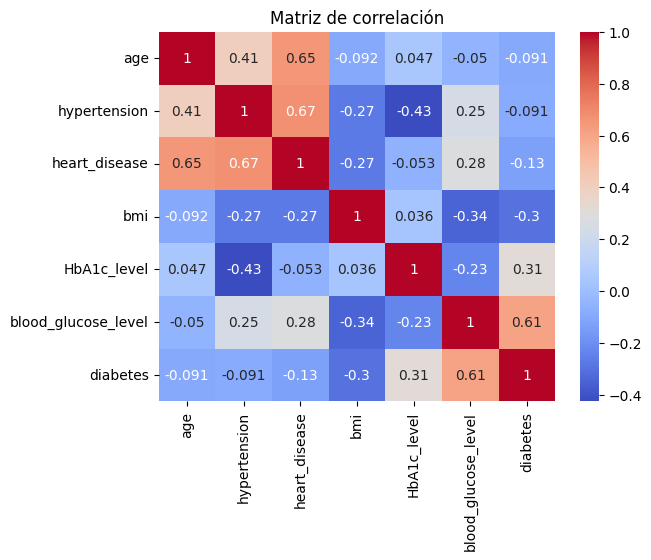

In [6]:
#Realizar correlaciones.

import seaborn as sns

# Cálculo de la matriz de correlación
correlation_matrix = data.corr()

# Visualización de la matriz de correlación en un heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


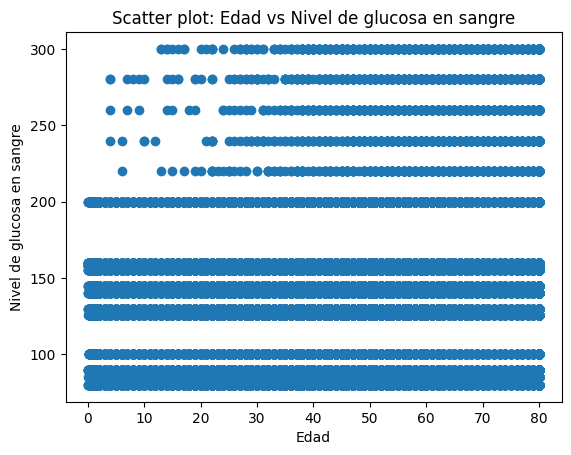

In [34]:
#Realizar scatters.

import matplotlib.pyplot as plt

# Scatter plot entre las columnas 'age' y 'blood_glucose_level'
plt.scatter(data['age'], data['blood_glucose_level'])
plt.xlabel('Edad')
plt.ylabel('Nivel de glucosa en sangre')
plt.title('Scatter plot: Edad vs Nivel de glucosa en sangre')
plt.show()


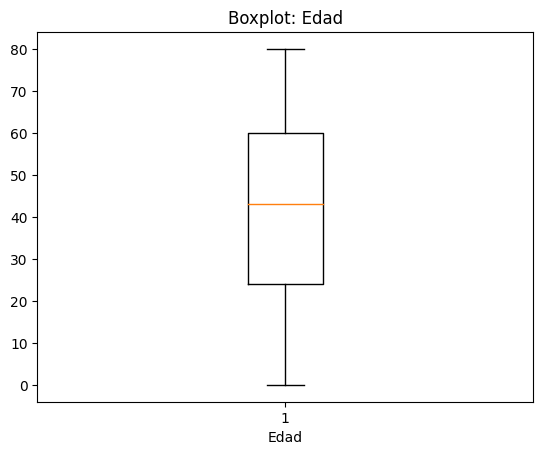

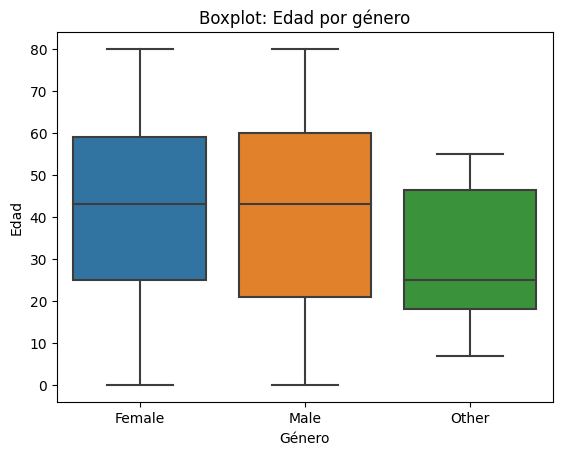

In [35]:
#Realizar boxplots.

# Boxplot de la columna 'age'
plt.boxplot(data['age'])
plt.xlabel('Edad')
plt.title('Boxplot: Edad')
plt.show()

# Boxplot de la columna 'age' agrupado por la columna 'gender'
sns.boxplot(x='gender', y='age', data=data)
plt.xlabel('Género')
plt.ylabel('Edad')
plt.title('Boxplot: Edad por género')
plt.show()
